In [68]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
citydata=pd.read_csv(city_data_to_load)
ridedata=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data=pd.merge(ridedata, citydata, how="left", on=["city", "city"])
# Display the data table for preview
data.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


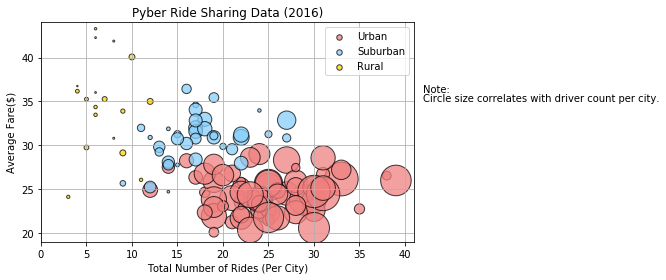

In [69]:
# Obtain the x and y coordinates for each of the three city types
def infobytype(citytype):
    datat=data[data["type"]==citytype]
    datag=datat.groupby(["city"])
    fareAvg=datag["fare"].mean()
    rides=datag["ride_id"].count()
    driver=datag["driver_count"].sum()
    return(pd.DataFrame({"FareAverage":fareAvg,
                        "TotalRides":rides,
                        "Drivers":driver}))

#infobytype("Urban").head()
# Build the scatter plots for each city types
citytype=["Urban", "Suburban", "Rural"]
colors=["lightcoral","lightskyblue","gold"]
i=0
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
for item in citytype:
    x_axis=infobytype(item)["TotalRides"]
    y_axis=infobytype(item)["FareAverage"]
    size=infobytype(item)["Drivers"]
    plt.scatter(x_axis, y_axis, s=size/2,c=colors[i],label=citytype[i], marker="o", edgecolors="black", alpha=0.75)
    i=i+1

# Incorporate the other graph properties

plt.ylim(19, 44)
plt.xlim(0, 41)
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
# Create a legend
#plt.legend(loc="upper right")
lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom

ax.annotate('Note:', xy=(40, 36),xytext=(42, 36))
ax.annotate('Circle size correlates with driver count per city.', xy=(40, 35),xytext=(42, 35))
# Save Figure
plt.savefig("BubblePlot_PyberRide.png", bbox_inches="tight")
# Show plot
plt.tight_layout()
plt.show()

## It can be seen that in general cities have a similar behavior in each type of city (urban, rural and suburban). As we can see in the bubble plot in the type of city "Rural", the average rate is the highest, but the number of rides and drivers are the lowest.
## On the other hand, in the type of city "Urban", the average rate is lowest, but the number of rides and drivers are the highest.

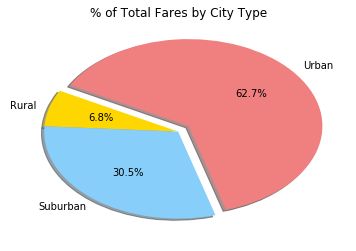

In [70]:
#% of Total Fares by City Type
# Calculate Type Percents
farepct = data.groupby('type').agg({'fare': 'sum'})
# Build Pie Chart
citytype=["Rural", "Suburban", "Urban"]
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)
fig=plt.figure(figsize=(6,4))
plt.pie(farepct['fare'], explode=explode, labels=citytype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=152)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("PiePlot_PctFares.png")
# Show Figure
plt.show()

## Although the average rate in the city type "Rural" is the highest, it is also known that the frequency of rides are the lowest, for this reason and given the pie chart, we can see that the percentage of the total fares is the lowest with a contribution of 6.8%, while the city type "Urban" contributes 62.7% of the fares.

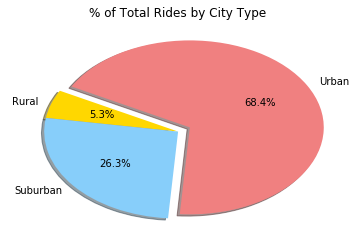

In [73]:
#% of Total Rides by City Type
# Calculate Ride Percents
ridespct = data.groupby('type').agg({'ride_id': 'count'})
# Build Pie Chart
citytype=["Rural", "Suburban", "Urban"]
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)
fig=plt.figure(figsize=(6,4))
plt.pie(ridespct['ride_id'], explode=explode, labels=citytype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=152)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("PiePlot_PctRides.png")
# Show Figure
plt.show()

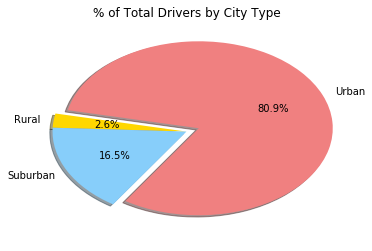

In [72]:
#% of Total Drivers by City Type
# Calculate Ride Percents
driverspct = citydata.groupby('type').agg({'driver_count': 'sum'})
# Build Pie Chart
citytype=["Rural", "Suburban", "Urban"]
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)
fig=plt.figure(figsize=(6,4))
plt.pie(driverspct['driver_count'], explode=explode, labels=citytype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=168)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("PiePlot_PctDrivers.png")
# Show Figure
plt.show()

## In these last two pie charts, we can observe a certain correlation between the number of rides and the number of drivers, as we see, 68.4% of the rides are concentrated in the city type "Urban", similarly the largest number of drivers are also in this city type with 80.9% of the total number of drivers.